In [1]:
%matplotlib inline


# Ejercicio de Manifold Learning: Proyecto Aceite de Oliva

### Aprendizaje máquina II (Curso 2023-2024)


### Nombre y apellidos: Jesús Martínez Leal, Carlos Sánchez Polo

### Carga de librerías necesarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px
from sklearn.manifold import TSNE
import umap
import plotly.subplots as tls

### 1.- Carga de datos.

Carga el conjunto de datos **olive.csv**. Este conjunto de datos clasifica diferentes tipos de aceites de oliva italianos en regiones (3 grupos) y áreas (9 grupos) en función de su composición. Separa el conjunto de datos en *X*, *y3* y *y9*.

In [3]:
rs = 0

In [2]:
path = './data/olive.csv'
data = pd.read_csv(path)

X = data.drop(['class', 'Region', 'Area'], axis = 1)

y3 = data['Region']
y9 = data['Area']

In [3]:
print("Dimensiones de X:", X.shape)
print("Dimensiones de y3:", y3.shape)
print("Dimensiones de y9:", y9.shape)

Dimensiones de X: (572, 8)
Dimensiones de y3: (572,)
Dimensiones de y9: (572,)


### 2.- Visualización de los datos.

- Utilizando los algoritmos t-SNE y UMAP vistos en clase, realiza una visualización de los datos en 2D y en 3D (utiliza la librería plotly para la representación 3D) coloreando los puntos con `labels3` y `labels9`. En UMAP, utiliza la versión no supervisada.
- Varía los parámetros de perplexity y n_neighbors según consideres y comenta qué valores has escogido y porqué.
- Comenta los gráficos y compara los resultados en función del valor de KL obtenido (en t-SNE). 


In [20]:
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X)

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Pasamos a graficar los plots 2D haciéndolos interactivos.

In [4]:
import plotly.express as px

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne = px.scatter(df_tsne, x='Dimension 1', y='Dimension 2', color='Area Labels', symbol='Region Labels',
                      title='t-SNE Visualization in 2D')
fig_tsne.update_layout(autosize=False, width=8000, height=600)

# Mostrar el gráfico interactivo
fig_tsne.show()


NameError: name 'df_tsne' is not defined

In [30]:
import plotly.express as px

# Crear un DataFrame para Plotly con t-SNE
df_tsne = pd.DataFrame(data={'Dimension 1': X_tsne_2d[:, 0], 'Dimension 2': X_tsne_2d[:, 1], 'Region Labels': y3, 'Area Labels': y9})

# Crear un gráfico interactivo con Plotly para t-SNE con y3
fig_tsne_y3 = px.scatter(df_tsne, x='Dimension 1', y='Dimension 2', color='Region Labels',
                          title='t-SNE Visualization in 2D (Region Labels)')
fig_tsne_y3.update_layout(autosize=False, width=500, height=400)

# Crear un gráfico interactivo con Plotly para t-SNE con y9
fig_tsne_y9 = px.scatter(df_tsne, x='Dimension 1', y='Dimension 2', color='Area Labels',
                          title='t-SNE Visualization in 2D (Area Labels)')
fig_tsne_y9.update_layout(autosize=False, width=500, height=400)

# Crear un DataFrame para Plotly con UMAP
df_umap = pd.DataFrame(data={'Dimension 1': X_umap_2d[:, 0], 'Dimension 2': X_umap_2d[:, 1], 'Region Labels': y3, 'Area Labels': y9})

# Crear un gráfico interactivo con Plotly para UMAP con y3
fig_umap_y3 = px.scatter(df_umap, x='Dimension 1', y='Dimension 2', color='Region Labels',
                         title='UMAP Visualization in 2D (Region Labels)')
fig_umap_y3.update_layout(autosize=False, width=500, height=400)

# Crear un gráfico interactivo con Plotly para UMAP con y9
fig_umap_y9 = px.scatter(df_umap, x='Dimension 1', y='Dimension 2', color='Area Labels',
                         title='UMAP Visualization in 2D (Area Labels)')
fig_umap_y9.update_layout(autosize=False, width=500, height=400)

# Mostrar los gráficos interactivos
fig_tsne_y3.show()
fig_tsne_y9.show()
fig_umap_y3.show()
fig_umap_y9.show()


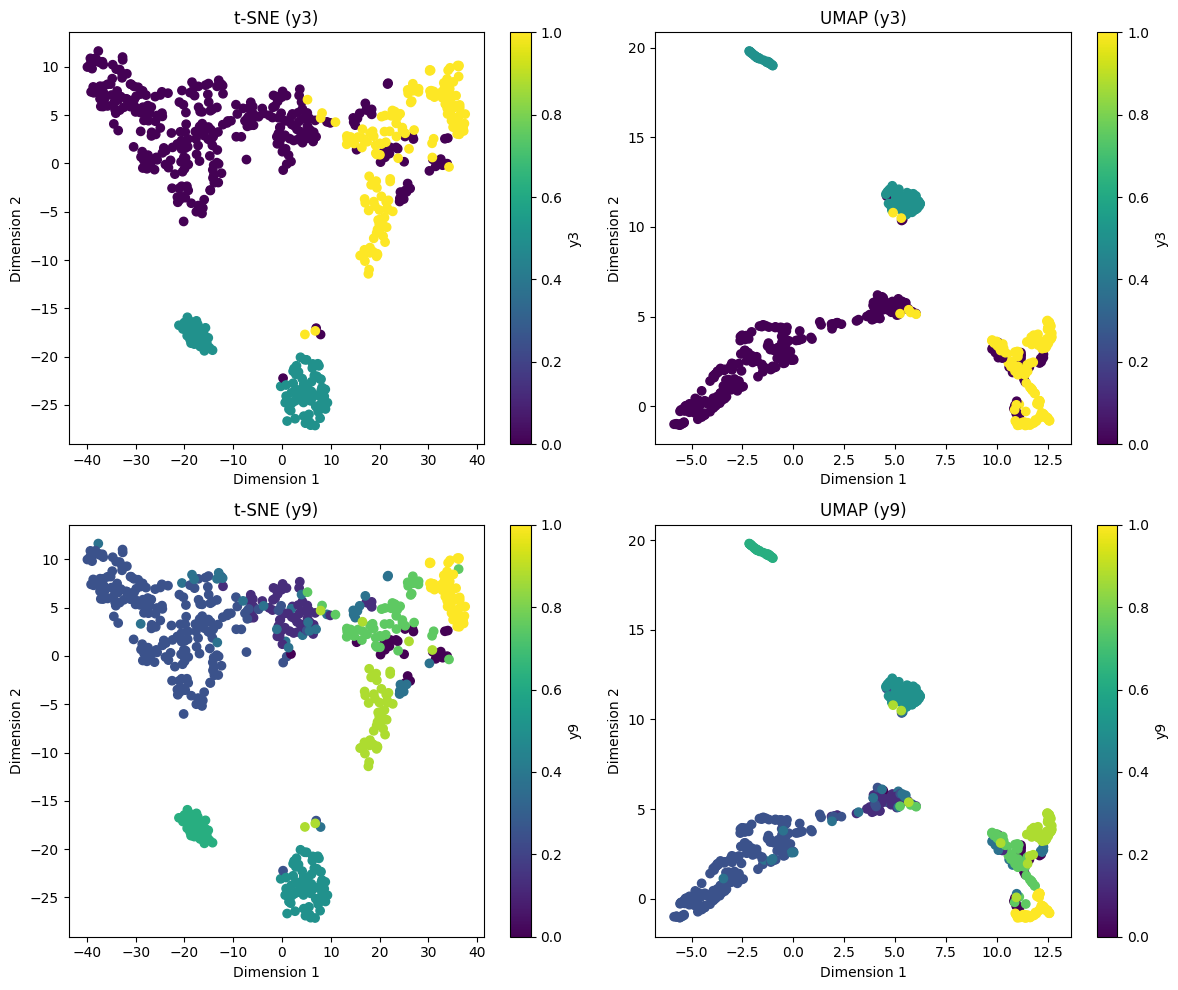

In [27]:
# Crear una figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot de t-SNE con y3
axs[0, 0].scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=y3, cmap='viridis')
axs[0, 0].set_title('t-SNE (y3)')
axs[0, 0].set_xlabel('Dimension 1')
axs[0, 0].set_ylabel('Dimension 2')
fig.colorbar(axs[0, 0].scatter([], [], c=[], cmap='viridis'), ax=axs[0, 0], label='y3')

# Scatter plot de UMAP con y3
axs[0, 1].scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y3, cmap='viridis')
axs[0, 1].set_title('UMAP (y3)')
axs[0, 1].set_xlabel('Dimension 1')
axs[0, 1].set_ylabel('Dimension 2')
fig.colorbar(axs[0, 1].scatter([], [], c=[], cmap='viridis'), ax=axs[0, 1], label='y3')

# Scatter plot de t-SNE con y9
axs[1, 0].scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=y9, cmap='viridis')
axs[1, 0].set_title('t-SNE (y9)')
axs[1, 0].set_xlabel('Dimension 1')
axs[1, 0].set_ylabel('Dimension 2')
fig.colorbar(axs[1, 0].scatter([], [], c=[], cmap='viridis'), ax=axs[1, 0], label='y9')

# Scatter plot de UMAP con y9
axs[1, 1].scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y9, cmap='viridis')
axs[1, 1].set_title('UMAP (y9)')
axs[1, 1].set_xlabel('Dimension 1')
axs[1, 1].set_ylabel('Dimension 2')
fig.colorbar(axs[1, 1].scatter([], [], c=[], cmap='viridis'), ax=axs[1, 1], label='y9')

plt.tight_layout()
plt.show()

In [6]:
tsne_2d = TSNE(n_components = 2, random_state = rs)

X_tsne_2d = tsne_2d.fit_transform(X)

In [7]:
fig_2d_tsne = px.scatter(x=X_tsne_2d[:,0], y=X_tsne_2d[:,1], color = y3,
                         labels = {'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'},
                         title = 'Visualización 2D con t-SNE (y3)')
fig_2d_tsne.show()

In [8]:
tsne_3d = TSNE(n_components = 3, random_state = rs)

X_tsne_3d = tsne_3d.fit_transform(X)

In [9]:
fig_3d_tsne = px.scatter_3d(x=X_tsne_3d[:,0], y=X_tsne_3d[:,1], z=X_tsne_3d[:,2], color=y3,
                            labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2', 'z': 't-SNE Dimension 3'},
                            title='Visualización 3D con t-SNE (y3)')
fig_3d_tsne.show()

In [12]:
umap_2d = umap.UMAP(n_components = 2, random_state = rs)

X_umap_2d = umap_2d.fit_transform(X)

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [13]:
# Definir el modelo UMAP para 2D
umap_2d = umap.UMAP(n_components=2, random_state=42)

# Aplicar UMAP a los datos
X_umap_2d = umap_2d.fit_transform(X)

# Crear un gráfico interactivo de Plotly para visualización en 2D con UMAP
fig_2d_umap = px.scatter(x=X_umap_2d[:,0], y=X_umap_2d[:,1], color=y9,
                         labels={'x': 'UMAP Dimension 1', 'y': 'UMAP Dimension 2'},
                         title='Visualización 2D con UMAP (y9)')
fig_2d_umap.show()



c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [14]:

umap_3d = umap.UMAP(n_components = 3, random_state = rs)

# Aplicar UMAP a los datos
X_umap_3d = umap_3d.fit_transform(X)

# Crear visualización 3D con UMAP y Plotly Express
fig_3d_umap = px.scatter_3d(x=X_umap_3d[:,0], y=X_umap_3d[:,1], z=X_umap_3d[:,2], color=y9,
                            labels={'x': 'UMAP Dimension 1', 'y': 'UMAP Dimension 2', 'z': 'UMAP Dimension 3'},
                            title='Visualización 3D con UMAP (y9)')
fig_3d_umap.show()

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



### 3.- Reducción de la dimensionalidad.

Realiza un estudio para averiguar la dimensionalidad intrínseca del dataset.

### 4.- Reducción de la dimensionalidad y clasificación de los aceites en Regions y Areas.

- Separa el conjunto de datos en train (70%) y test (30%).
- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.
- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.
- ¿Qué algoritmo de reducción de la dimensionalidad obtiene el mejor score para clasificar los datos en regiones? ¿Y en áreas? ¿Es el procedimiento más rápido en términos de tiempo de ejecución? Realiza una tabla con el rendimiento de la clasificación de cada algoritmo de reducción de dimensionaidad y el tiempo de ejecución.

In [ ]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

#### 4.1 Clasificación 3 grupos

#### 4.2 Clasificación 9 grupos